In [82]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [83]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [129]:
from google.colab import drive
drive.mount('/YM_drive')

Drive already mounted at /YM_drive; to attempt to forcibly remount, call drive.mount("/YM_drive", force_remount=True).


In [130]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from PIL import Image



import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
import os

import spacy


In [188]:
file_1 = r'/YM_drive/My Drive/Colab Notebooks/Sentiment/BanglaDB/Untitled folder/sarcasm.csv'


ds = pd.read_csv(file_1)



In [189]:
print ('Data\n')
print (ds.shape)
ds.info()


Data

(39780, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39780 entries, 0 to 39779
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       39780 non-null  int64 
 1   tweet    39780 non-null  object
 2   sarcasm  39780 non-null  int64 
 3   humor    39780 non-null  int64 
 4   insult   39780 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ MB


In [190]:
print(ds.isnull().sum())


id         0
tweet      0
sarcasm    0
humor      0
insult     0
dtype: int64


In [191]:
ds.dropna(inplace=True)
ds.head()

,id,tweet,sarcasm,humor,insult
0,1,আমি আশা করি আপনি লুকিয়ে আছেন আরএন আমি হ্যালুস...,0,0,0
1,2,05 সত্যিই আমাকে একটি মূল্যবান পাঠ শিখিয়েছে আম...,0,1,1
2,3,@ 098BERRY এর প্রতিবাদ করার জন্য কখনই কণ্ঠস্বর...,0,0,0
3,4,@ 0hmySt4rs শান্তিতে বিশ্রাম দিন এবং আপনাকে এব...,0,0,1
4,5,ক্রিসমাস পর্যন্ত 100 দিন! ?? # খুব শীঘ্রই # এখ...,0,0,1


In [140]:

#ds=ds.fillna(' ')

#train['joint_sentence']=train['headline']+' '+train['content']


#test=test.fillna(' ')
#test['joint_sentence']=test['headline']+' '+test['content']

#test['total']=test['headline']+' '+test['domain']+test['content']
#train['total']=train['headline']+' '+train['domain']+train['content']

In [141]:
#print(train)

In [192]:
#STOPWORDS


sw = ['অবশ্য','অনেক','অনেকে','অনেকেই','অন্তত','অথবা','অথচ','অর্থাত','অন্য','আজ','আছে','আপনার','আপনি','আবার','আমরা','আমাকে','আমাদের','আমার','আমি','আরও','আর','আগে','আগেই','আই','অতএব','আগামী','অবধি',
'অনুযায়ী','আদ্যভাগে','এই','একই','একে','একটি','এখন','এখনও','এখানে','এখানেই','এটি','এটা','এটাই','এতটাই','এবং','একবার','এবার','এদের','এঁদের','এমন','এমনকী','এল','এর','এরা','এঁরা','এস',
'এত','এতে','এসে','একে','এ','ঐ','ই','ইহা','ইত্যাদি','উনি','উপর','উপরে','উচিত','ও','ওই','ওর','ওরা','ওঁর','ওঁরা','ওকে','ওদের','ওঁদের','ওখানে','কত','কবে','করতে','কয়েক','কয়েকটি','করবে','করলেন','করার','কারও','করা','করি','করিয়ে','করার','করাই','করলে','করলেন','করিতে','করিয়া','করেছিলেন','করছে',
'করছেন','করেছেন','করেছে','করেন','করবেন','করায়','করে','করেই','কাছ','কাছে','কাজে','কারণ','কিছু','কিছুই','কিন্তু','কিংবা','কি','কী','কেউ','কেউই','কাউকে','কেন','কে','কোনও','কোনো','কোন','কখনও','ক্ষেত্রে','খুব',	'গুলি','গিয়ে','গিয়েছে','গেছে','গেল','গেলে','গোটা','চলে','ছাড়া','ছাড়াও','ছিলেন',
'ছিল','জন্য','জানা','ঠিক','তিনি','তিনিও','তখন','তবে','তবু','তাঁদের','তাঁহারা','তাঁরা','তাঁর','তাঁকে','তাই','তেমন','তাকে','তাহা','তাহাতে','তাহার','তাদের','তারপর','তারা','তারৈ','তার','তাহলে','তিনি','তা','তাও','তাতে','তো','তত',
'তুমি','তোমার','তথা','থাকে','থাকা','থাকায়','থেকে','থেকেও','থাকবে','থাকেন','থাকবেন','থেকেই','দিকে','দিতে','দিয়ে','দিয়েছে','দিয়েছেন','দিলেন','দু',
'দুটি','দুটো','দেয়','দেওয়া','দেওয়ার','দেখা','দেখে','দেখতে','দ্বারা','ধরে','ধরা','নয়','নানা','না','নাকি','নাগাদ','নিতে','নিজে','নিজেই','নিজের','নিজেদের','নিয়ে','নেওয়া','নেওয়ার','নেই','নাই','পক্ষে','পর্যন্ত','পাওয়া','পারেন','পারি','পারে','পরে','পরেই',
'পরেও','পর','পেয়ে','প্রতি','প্রভৃতি','প্রায়','ফের','ফলে','ফিরে','ব্যবহার','বলতে','বললেন','বলেছেন','বলল','বলা','বলেন','বলে','বহু','বসে','বার','বা','বিনা','বরং','বদলে',
'বাদে','মাঝে','বাদে','বার','বিশেষ','বিভিন্ন','বিষয়টি','ব্যবহার','ব্যাপারে','ভাবে','ভাবেই','মধ্যে','মধ্যেই','মধ্যেও','মধ্যভাগে','মাধ্যমে','মাত্র','মতো','মতোই','মোটেই','যখন','যদি','যদিও','যাবে','যায়','যাকে','যাওয়া','যাওয়ার','যত','যতটা',
'যা','যার','যারা','যাঁর','যাঁরা','যাদের','যান','যাচ্ছে','যেতে','যাতে','যেন','যেমন','যেখানে','যিনি','যে','রেখে','রাখা','রয়েছে','রকম','শুধু','সঙ্গে','সঙ্গেও','সমস্ত','সব','সবার','সহ','সুতরাং','সহিত','সেই','সেটা','সেটি','সেটাই','সেটাও','সম্প্রতি','সেখান','সেখানে','সে',
'স্পষ্ট','স্বয়ং','হইতে','হইবে','হৈলে','হইয়া','হচ্ছে','হত','হতে','হতেই','হবে','হবেন','হয়েছিল','হয়েছে','হয়েছেন','হয়ে','হয়নি','হয়','হয়েই','হয়তো','হল','হলে','হলেই','হলেও','হলো','হিসাবে','হওয়া','হওয়ার','হওয়ায়','হন','হোক',
'জন','জনকে','জনের,''জানতে','জানায়','জানিয়ে','জানানো','জানিয়েছে','জন্য','জন্যওজে','জে','বেশ','দেন','তুলে','ছিলেন','চান','চায়','চেয়ে','মোট','যথেষ্ট','টি' ]



In [193]:
print(sw)

['অবশ্য', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অথবা', 'অথচ', 'অর্থাত', 'অন্য', 'আজ', 'আছে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আরও', 'আর', 'আগে', 'আগেই', 'আই', 'অতএব', 'আগামী', 'অবধি', 'অনুযায়ী', 'আদ্যভাগে', 'এই', 'একই', 'একে', 'একটি', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটি', 'এটা', 'এটাই', 'এতটাই', 'এবং', 'একবার', 'এবার', 'এদের', 'এঁদের', 'এমন', 'এমনকী', 'এল', 'এর', 'এরা', 'এঁরা', 'এস', 'এত', 'এতে', 'এসে', 'একে', 'এ', 'ঐ', 'ই', 'ইহা', 'ইত্যাদি', 'উনি', 'উপর', 'উপরে', 'উচিত', 'ও', 'ওই', 'ওর', 'ওরা', 'ওঁর', 'ওঁরা', 'ওকে', 'ওদের', 'ওঁদের', 'ওখানে', 'কত', 'কবে', 'করতে', 'কয়েক', 'কয়েকটি', 'করবে', 'করলেন', 'করার', 'কারও', 'করা', 'করি', 'করিয়ে', 'করার', 'করাই', 'করলে', 'করলেন', 'করিতে', 'করিয়া', 'করেছিলেন', 'করছে', 'করছেন', 'করেছেন', 'করেছে', 'করেন', 'করবেন', 'করায়', 'করে', 'করেই', 'কাছ', 'কাছে', 'কাজে', 'কারণ', 'কিছু', 'কিছুই', 'কিন্তু', 'কিংবা', 'কি', 'কী', 'কেউ', 'কেউই', 'কাউকে', 'কেন', 'কে', 'কোনও', 'কোনো', 'কোন', 'কখনও', 'ক্ষেত্রে', 'খুব', 'গুলি', 'গিয়ে'

In [194]:
def clean_emoji(text):
  
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    return text

In [145]:
!pip install bnltk

In [195]:

from bnltk.stemmer import BanglaStemmer

def prep(sentence):
    
    # sentence train/test
    bn_stemmer = BanglaStemmer()

    for index,row in sentence.iterrows():

        filter_sentence = ''
    
    #cleaning

        with_emo_sentence = row['tweet']

    #removing emoji

        with_punct_sentence = clean_emoji(with_emo_sentence)

        punctuations = '''!()-|…“”[]{};:'"\,<>./?@#$%^&*_~'''
        punct_removed_sentence = ""
        for char in with_punct_sentence:
            if char not in punctuations:
               punct_removed_sentence = punct_removed_sentence.lower() + char

   
    #tokenization

        words_with_sw = nltk.word_tokenize(punct_removed_sentence)
   
    #stopwords removal

        words_removed_sw = [w for w in words_with_sw if not w in sw]  
    

        for word in words_removed_sw:
            filter_sentence = filter_sentence + ' ' + str(bn_stemmer.stem(word))
        
            sentence.loc[index,'tweet'] = filter_sentence
   
    
    return sentence


In [196]:
trained_ds = prep(ds)
trained_ds = trained_ds[['tweet','sarcasm']]
print(trained_ds)

                                                   tweet  sarcasm
0       আশা লুকিয় আছ আরএন হ্যালুসিনেশন শুন চা আপনা দ...        0
1                   05 সত্যি মূল্যবান পাঠ শিখিয় দেরী কর        0
2       098berry প্রতিবাদ কখন কণ্ঠস্বর হজম ছিলে। ত্রু...        0
3       0hmyst4rs শান্তি বিশ্রাম দিন আপনা পরিবার ভালবাসা        0
4                    ক্রিসমাস 100 দিন শীঘ্র প্রস্তুত নয়        0
...                                                  ...      ...
39775   জেন্ডায়া মেকআপ শিল্পী আপনা এশিয়ান টাইপ চেহা...        1
39776   ziggiwatkins11 slvr thats great name not sarcasm        1
39777   zoso4986 নেরো তৈরি fag এখন প্রাপ্য fag নয়। s...        1
39778   জুমা কানা পশ্চিম শোনা সমাজতন্ত্র পুঁজিবা পার্...        1
39779   zzucru uwdawgpack সত্য। ছাত্র চারপাশ লাঠি মজা...        1

[39780 rows x 2 columns]


In [200]:
file_2 = r'/YM_drive/My Drive/Colab Notebooks/Sentiment/BanglaDB/Untitled folder/v.xlsx'


t = pd.read_excel(file_2)


tt = prep(t)
tt = tt[['tweet','s']]
print(tt)

                                                tweet  s
0    ডাক্ত নার্স স্বাস্থ্যকর্মী ব্যতীত ডাক্তার পিপ...  1
1    করোনা ভাইরাস দুর্যোগপূর্ণ অবস্থা গর্ভবতী মায়...  0
2    সম্ভব মানা চল চেষ্ করুন। সুস্থ থাকুন অপরকে সু...  0
3    ডেঙ্গু বাঁচ হারপিক ব্লিচিং পাউড দূর থাকুন। মৃ...  0
4                           পারা ব্যার্থ ৩ কাজ ভুলে p  1
5    বাংল সুপারম্যান 💪💪 বিমান জানলা ব ফাংখা নামা গ...  1
6    গভীর শ্রদ্ধাভর স্মরণ ২৫শ ফেব্রুয়ারি পিলখানা শ...  0
7                       খালা আমি খাব জন খাব রান্না 😜😂  1
8    বেঁচ থাকুক পৃথিবীর সকল ভাষাভাষ মাস অন্য মায় ভ...  0
9    আজক কাছ মানুষ আগামীকাল অপ্রি উঠ মানুষ চিন শিখ...  0
10   আজক কাছ মানুষ আগামীকাল অপ্রি উঠ মানুষ চিন শিখ...  0
11   বাবা একজন মিথ্যাবাদী শ্রেষ্ঠ্য ইমোশনাল অ্যাড ...  0
12                              চরম এক জিন বানাইস 😮😮😮  1
13                        একটু মজা নিলাম p রাগ please  1
14   প্রথম স্ত্রী দ্বিতীয় স্ত্রীর কথা বল ভাবা চিন্ 😂  1
15   বেআদব সাকিব শাস্তি দিচ্ছ প্রধানমন্ত্রী। দেখুন...  1
16   সবা এটা ফানি মন করবে। বাস্

In [201]:

import tensorflow as tf
import seaborn as sbs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression



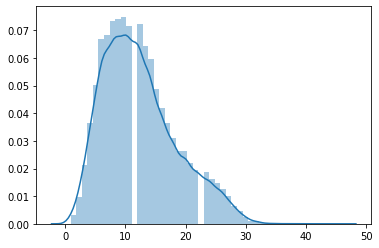

In [261]:
vocab_size = 40000# max_features 
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(trained_ds.tweet)
tokenizer.fit_on_texts(tt.tweet)

trained_ds_inputs = tokenizer.texts_to_sequences(trained_ds.tweet)
tt_in = tokenizer.texts_to_sequences(tt.tweet)

sbs.distplot([len(l) for l in trained_ds_inputs])

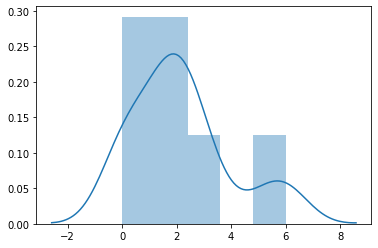

In [228]:

tokenizer.fit_on_texts(tt.tweet)

tt_in = tokenizer.texts_to_sequences(tt.tweet)
sbs.distplot([len(l) for l in tt_in])


In [262]:
trained_ds_inputs = tf.keras.preprocessing.sequence.pad_sequences(trained_ds_inputs, padding='post', maxlen=20)
trained_ds_labels = trained_ds['sarcasm']

# Split data into train /validation 
X_train, X_test, Y_train, Y_test = train_test_split(trained_ds_inputs, trained_ds_labels, test_size=0.2, random_state=42)


trained_ds_inputs[1]

array([9890,  108, 2016, 2131, 2467, 1781,   62,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [254]:
print(X_train.shape)

(31824, 20)


In [263]:
##
tt_in = tf.keras.preprocessing.sequence.pad_sequences(tt_in, padding='post', maxlen=20)
tt_s = tt['s']

#X_train1, X_test1, Y_train1, Y_test1 = train_test_split(tt_in, tt_s, test_size=0.3, random_state=42)

In [243]:
print(trained_ds_inputs)

[[120 667 306 ...   0   0   0]
 [108  62   0 ...   0   0   0]
 [210   0   0 ...   0   0   0]
 ...
 [233 363 370 ...   0   0   0]
 [153   0   0 ...   0   0   0]
 [310 527 302 ...   0   0   0]]


In [264]:
#NB

nb = MultinomialNB()
nb.fit(X_train, Y_train)

y_preds = nb.predict(X_test)

print(f"Accuracy score", accuracy_score(Y_test, y_preds))



Accuracy score 0.588360985419809


In [245]:
print(tt_in.shape)

(20, 20)


In [265]:
##

y_preds1 = nb.predict(tt_in)

print(f"Accuracy score", accuracy_score(tt_s, y_preds1))


Accuracy score 0.3


In [267]:
print(y_preds1,tt_s)

[1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0] 0     1
1     0
2     0
3     0
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    0
19    1
Name: s, dtype: int64


In [247]:
#LSTM


max_len = 20
text_input = tf.keras.Input(shape=(max_len, ))
embed_text = tf.keras.layers.Embedding(vocab_size, 128)(text_input)

net = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(embed_text)
net = tf.keras.layers.GlobalMaxPool1D()(net)
net = tf.keras.layers.Dense(64, activation='relu')(net)
net = tf.keras.layers.Dropout(0.4)(net)
net = tf.keras.layers.Dense(32, activation='relu')(net)
net = tf.keras.layers.Dropout(0.4)(net)

output = tf.keras.layers.Dense(1, activation='sigmoid')(net)
model = tf.keras.models.Model(text_input, output)
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 20, 128)           102400    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 20, 64)            41216     
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080

In [248]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

mc = tf.keras.callbacks.ModelCheckpoint('model_best.hdf5', monitor='val_accuracy', 
                                        verbose=1, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5)
    
history = model.fit(X_train, Y_train,
                    epochs=30, batch_size=256, callbacks=[mc, es], 
                    validation_split=0.1, verbose=1)

Epoch 1/30
112/112 [==============================] - ETA: 0s - loss: 0.3885 - accuracy: 0.8405
Epoch 00001: val_accuracy improved from -inf to 0.92680, saving model to model_best.hdf5
112/112 [==============================] - 9s 83ms/step - loss: 0.3885 - accuracy: 0.8405 - val_loss: 0.1904 - val_accuracy: 0.9268
Epoch 2/30
112/112 [==============================] - ETA: 0s - loss: 0.1854 - accuracy: 0.9295
Epoch 00002: val_accuracy did not improve from 0.92680
112/112 [==============================] - 8s 76ms/step - loss: 0.1854 - accuracy: 0.9295 - val_loss: 0.1865 - val_accuracy: 0.9255
Epoch 3/30
112/112 [==============================] - ETA: 0s - loss: 0.1756 - accuracy: 0.9318
Epoch 00003: val_accuracy did not improve from 0.92680
112/112 [==============================] - 9s 76ms/step - loss: 0.1756 - accuracy: 0.9318 - val_loss: 0.1882 - val_accuracy: 0.9255
Epoch 4/30
112/112 [==============================] - ETA: 0s - loss: 0.1708 - accuracy: 0.9324
Epoch 00004: val_accu

In [250]:
model = tf.keras.models.load_model('model_best.hdf5')
y_preds = model.predict(X_test, batch_size=100).round().astype(int)
print("Test accracy score", accuracy_score(Y_test, y_preds))

Test accracy score 0.9288587229763701


In [251]:
###


model1 = tf.keras.models.load_model('model_best.hdf5')
y_preds2 = model.predict(tt_in, batch_size=100).round().astype(int)
print("Test accracy score", accuracy_score(tt_s, y_preds2))

Test accracy score 0.45


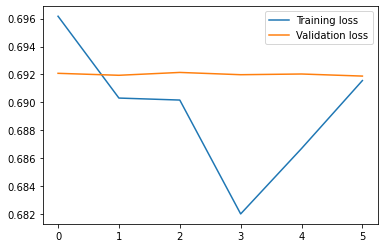

In [168]:
# plot loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.show()

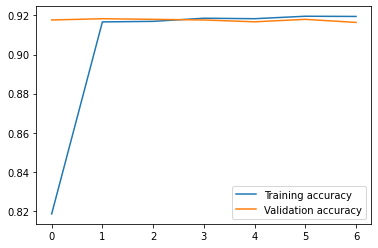

In [81]:
# plot accuracy 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show()

In [73]:
#LR


logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)
pred = logreg.predict(X_test)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, Y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, Y_test)))

from sklearn.naive_bayes import MultinomialNB
cm = confusion_matrix(Y_test, pred)
print (cm)

Accuracy of Lasso classifier on training set: 0.56
Accuracy of Lasso classifier on test set: 0.57
[[3250 1021]
 [2375 1310]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [64]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D, SpatialDropout1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping

import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [65]:
##Bidirection CuDNN
embed_size = 300 
max_features = 50000 
maxlen = 100 






inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size)(inp)
x = Bidirectional(CuDNNGRU(128, return_sequences=True))(x)
x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
x = Bidirectional(CuDNNGRU(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(32, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(16, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1, activation="sigmoid")(x)
model1 = Model(inputs=inp, outputs=x)
adam =  Adam(lr=0.0001,decay=0.00001)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

print(model1.summary())

ModuleNotFoundError: ignored

In [ ]:
tf_idf_matrix

<31x887 sparse matrix of type '<class 'numpy.float64'>'
	with 2111 stored elements in Compressed Sparse Row format>

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
final_prediction = tf.squeeze(final_outputs.stack())

In [ ]:
saver = tf.train.Saver()
init = tf.global_variables_initializer()

In [ ]:
#Model Implemetation

with tf.Session() as sess:
    sess.run(init)
    m = len(train_caption)
    for epoch in range(training_iters):
        total_cost = 0
        total_acc = 0
        for i in range(m):
            _, cst, acc = sess.run([optimizer, cost, accuracy], feed_dict = {x_caption:train_caption[i][:-1].A, x_inp:train[i:i+1], y:train_caption[i][1:].A})
            total_cost += cst
            total_acc += acc
        if (epoch + 1) % display_step == 0:
            print('After ', (epoch + 1), 'iterations: Cost = ', total_cost / m, 'and Accuracy: ', total_acc * 100/ m , '%' )
    print('Optimization finished!')
    print("Let's check")
    for tests in range(num_tests):
        image_num = random.randint(0, sample_size - 1)
        caption = sess.run(final_prediction, feed_dict = {x_inp:train[image_num:image_num + 1]})
        print(caption.shape)
        caption = np.argmax(caption[:-1], 1)
        capt = ''
        for i in caption:
            capt += rev_dict[i] + ' '
        print('Predicted Caption:->', capt)
        orig_cap = np.argmax(train_caption[image_num:image_num + 1][0][1:-1].A, 1)
        orignalcaption = ''
        for i in orig_cap:
            orignalcaption += rev_dict[i] + ' '
        print('Orignal Caption:->', orignalcaption)
        plt.imshow(real_images[image_num])
        plt.title('Image')
        plt.show()